## Iris Detector: the famous Iris flowers dataset
This project sources data from the iris data set: https://archive.ics.uci.edu/dataset/53/iris
We can follow the machine learning workflow we described.

Other sources of reference for this: 
- https://machinelearningmastery.com/machine-learning-in-python-step-by-step/
- https://www.kaggle.com/code/mohamedtarek111/iris-classification-with-100-acc/notebook 


## 1. Data Collection 

Some useful questions to ask when collecting data is:
- What data is relevant?
- How was the data sampled?
- How can we clean the data?
- Are there privacy issues?

In [1]:
import pandas as pd

# Import iris flower dataset
columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class'] 
df_iris=pd.read_csv('iris/Iris.csv',names=columns)


## 2. Data preparation
Once we've loaded the data in, it's good to look at the data and understand the data from multiple angles by describing using stats and visualising the data.

### Describing data using stats

In [2]:
df_iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [3]:
# Check for any null values
df_iris.isnull().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
class           0
dtype: int64

In [4]:
# This tells us how many flowers are in each class
df_iris.value_counts('class')

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

### Visualising the data
There are two typs of plots we are going to look at: univariate and multivariate. 
1. Univariate look at relationship of one variable. Examples: histograms, bar charts, pie charts and box plots.
2. Multivariate look at relationships between two or more variables. Example: scatter plot matrix

#### Univariate plots

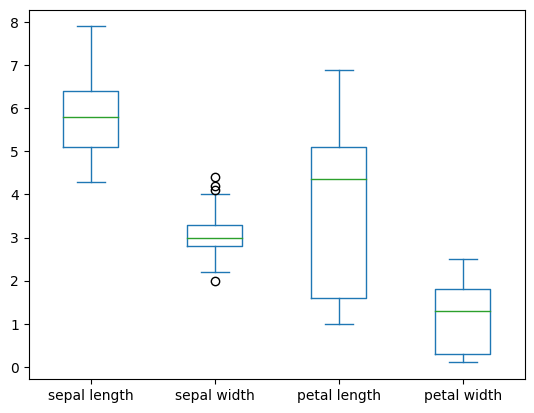

In [5]:
import matplotlib.pyplot as plt

# box and whisker plot
df_iris.plot(kind='box',layout=(2,2))
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

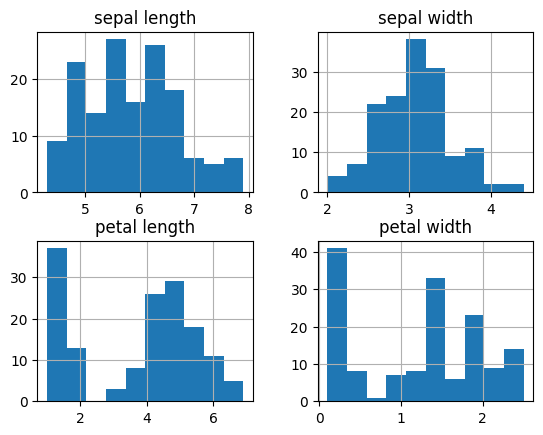

In [6]:
df_iris.hist()
plt.show

#### Multivariate plots

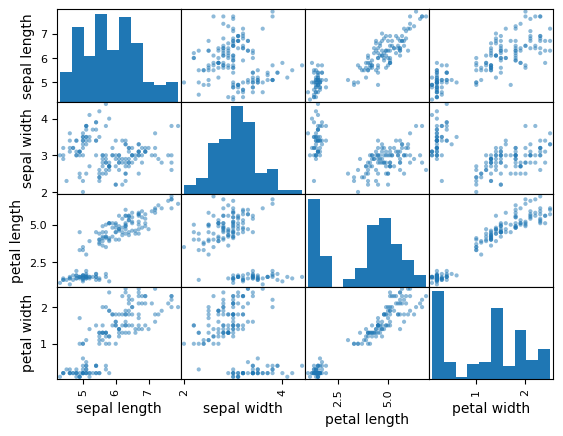

In [7]:
from pandas.plotting import scatter_matrix

# scatter plot matrix
scatter_matrix(df_iris)
plt.show()

### Split the data
Split the data into a training set and testing set. The training set is used to train the model and the remaining 20% is used as test data. This test data will be used in the validation stage to see how accurate the model is.

In [8]:
from sklearn.model_selection import train_test_split

# Devide data into  
X=df_iris.iloc[:,:-1]
y=df_iris.iloc[:,-1]

#Splitting the data into the training and testing set  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10) 

## 3. Train the model

It's unclear which algorithmn to use for this dataset so we should try different algorithm and evaluate which one is best.

Linear:
- Logistic Regression (LR): models chances of an instance being in a class by using a line with the logistic sigmoid function.
    - **Anaology**: Imagine you have two types of fruits, apples and oranges, and you want to separate them based on their size and color. Logistic Regression draws an imaginary line that divides the fruits into two groups, apples on one side and oranges on the other (Anaology made using AI)

- Linear Discriminant Analysis (LDA): finds the best direction that separates the classes and projects the data onto that direction.
    - **Anaology**: Let's say you have a bunch of toys, like cars, dolls, and balls, and you want to sort them into different boxes. LDA finds the best way to tilt the boxes so that when you drop the toys, they separate into the correct boxes based on their shapes and sizes (Anaology made using AI)

Non-linear: 
- K-Nearest Neighbors (KNN): finds the closest neighbours (most similar)
    - **Anaology**: Imagine you have a new toy, and you want to know if it's a car, a doll, or a ball. KNN looks at the toys that are most similar to your new toy (the K nearest neighbors) and puts your new toy in the same group as the majority of those similar toys.(Anaology made using AI)
- Classification and Regression Trees (CART).
- Gaussian Naive Bayes (NB).
- Support Vector Machines (SVM)

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LogisticRegression', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LinearDiscriminantAnalysis', LinearDiscriminantAnalysis()))
models.append(('KNeighborsClassifier', KNeighborsClassifier()))
models.append(('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append(('GaussianNB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))


We will split the data into 10 parts where the data is trained on 9 parts and tested on 1. 

Stratified means that each split has the same distribution of examples by class. This helps prevent any single fold from being biased towards certain classes and ensures that each fold is representative of the overall data distribution.


The random_state argument is set to a fixed number to ensure that each algorithm is evaluated on the same splits of the training dataset. This ensures reproducibility and a fair comparison between different machine learning algorithms, it is important that all algorithms are evaluated on the same splits of the training data. The random_state argument is a parameter that allows you to set the starting point (seed) for the random number generator used in the shuffling and splitting process. This will produce the same sequence of random numbers every time, resulting in the same shuffling and splitting of the dataset.


The scoring argument is set to ‘accuracy‘ to evaluate models. This is a ratio of the number of correctly predicted instances divided by the total number of instances in the dataset multiplied by 100 to give a percentage (e.g. 95% accurate)

## 4. Evaluate the model

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LogisticRegression: 0.941667 (0.065085)
LinearDiscriminantAnalysis: 0.975000 (0.053359)
KNeighborsClassifier: 0.958333 (0.041667)
DecisionTreeClassifier: 0.908333 (0.078617)
GaussianNB: 0.941667 (0.065085)
SVC: 0.966667 (0.040825)


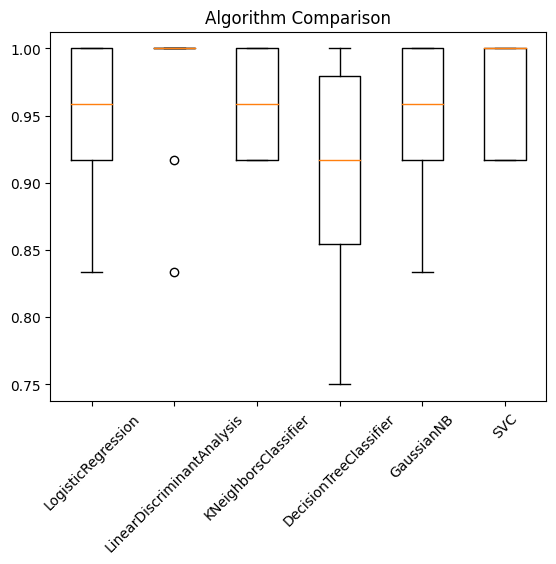

In [11]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.xticks(rotation=45)
plt.show()

## 5. Deploy the model
The resutls of the LinearDiscriminantAnalysis look strange, so the next best model SVC is selected and used to make the prediction.

In [12]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# creates an instance of the Support Vector Classifier (SVC) model 
model = SVC(gamma='auto')
# This line trains the SVC model using the training data
model.fit(X_train, y_train)
# The trained model is used to make predictions on the test data X_test
predictions = model.predict(X_test)
# Evaluate predictions
print(accuracy_score(y_test, predictions))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))

1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         7

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30

